In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('Attrition_data.csv')

# Understanding the dataset

In [8]:
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [9]:
df.head(2)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

In [11]:
df.duplicated().any()

np.False_

In [12]:
df['EmployeeID'].duplicated().any()

np.True_

In [13]:
df['EmployeeID'].duplicated().sum()

np.int64(43369)

observation
-----------------------------
1. rows having duplicate eid must be removed
2. there is no missing data
3. four date columns are in object data type 
4. gender_short , store_name is not required


# DATA CLEANING

In [14]:
df['EmployeeID']=df['EmployeeID'].drop_duplicates(keep='last')

df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,NaN,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,NaN,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,NaN,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,NaN,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,NaN,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [15]:
df=df.dropna() 
df=df.reset_index(drop=True)

df=df.astype({'EmployeeID':int})

df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
1,1319,12/31/2015 0:00,1/3/1957,8/28/1989,1/1/1900,58,26,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
2,1320,12/31/2015 0:00,1/2/1955,8/28/1989,1/1/1900,60,26,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
3,1321,12/31/2015 0:00,1/2/1959,8/28/1989,1/1/1900,56,26,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
4,1322,12/31/2015 0:00,1/9/1958,8/31/1989,1/1/1900,57,26,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [16]:
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

In [17]:
for i in df.columns[ [1,2,3,4] ]:
    df[i]=pd.to_datetime(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6284 entries, 0 to 6283
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   EmployeeID           6284 non-null   int64         
 1   recorddate_key       6284 non-null   datetime64[ns]
 2   birthdate_key        6284 non-null   datetime64[ns]
 3   orighiredate_key     6284 non-null   datetime64[ns]
 4   terminationdate_key  6284 non-null   datetime64[ns]
 5   age                  6284 non-null   int64         
 6   length_of_service    6284 non-null   int64         
 7   city_name            6284 non-null   object        
 8   department_name      6284 non-null   object        
 9   job_title            6284 non-null   object        
 10  store_name           6284 non-null   int64         
 11  gender_short         6284 non-null   object        
 12  gender_full          6284 non-null   object        
 13  termreason_desc      6284 non-nul

In [18]:
df=df.drop(columns=['gender_short','store_name'])
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'gender_full', 'termreason_desc',
       'termtype_desc', 'STATUS_YEAR', 'STATUS', 'BUSINESS_UNIT'],
      dtype='object')

# DATA TRANSFORMATION / MANIPULATION

In [19]:
df=df.rename(columns={'EmployeeID':'eid', 
                   'recorddate_key':'record_date', 
                   'birthdate_key':'DOB',
                   'orighiredate_key':'hiredate',
                    'terminationdate_key':'term_date', 
                    'length_of_service':'experience',
                    'department_name':'dname', 
                    'job_title':'job',
                    'gender_full':'gender', 
                    'termreason_desc':'term_reason', 
                    'termtype_desc':'term_type', 
                    'STATUS_YEAR':'status_year',
                    'STATUS':'status', 
                    'BUSINESS_UNIT':'business_unit'})

df.columns

Index(['eid', 'record_date', 'DOB', 'hiredate', 'term_date', 'age',
       'experience', 'city_name', 'dname', 'job', 'gender', 'term_reason',
       'term_type', 'status_year', 'status', 'business_unit'],
      dtype='object')

In [20]:
df.loc[ df['status']=='TERMINATED' , ['hiredate','term_date','record_date']].head()

,hiredate,term_date,record_date
4799,1989-09-20,2009-02-16,2009-02-01
4800,1989-09-22,2014-02-19,2014-02-01
4801,1989-09-22,2009-02-19,2009-02-01
4802,1989-09-23,2009-02-21,2009-02-01
4803,1989-09-25,2014-02-24,2014-02-01


In [21]:
df.loc[ df['status']=='ACTIVE' , ['hiredate','term_date','record_date']].head()

,hiredate,term_date,record_date
0,1989-08-28,1900-01-01,2015-12-31
1,1989-08-28,1900-01-01,2015-12-31
2,1989-08-28,1900-01-01,2015-12-31
3,1989-08-28,1900-01-01,2015-12-31
4,1989-08-31,1900-01-01,2015-12-31


In [ ]:
cond = (df['status']=='ACTIVE')

df.loc[ cond , 'term_date'] = df.loc[ cond , 'record_date']

In [23]:
df.head(3)

,eid,record_date,DOB,hiredate,term_date,age,experience,city_name,dname,job,gender,term_reason,term_type,status_year,status,business_unit
0,1318,2015-12-31,1954-01-03,1989-08-28,2015-12-31,61,26,Vancouver,Executive,CEO,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
1,1319,2015-12-31,1957-01-03,1989-08-28,2015-12-31,58,26,Vancouver,Executive,VP Stores,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
2,1320,2015-12-31,1955-01-02,1989-08-28,2015-12-31,60,26,Vancouver,Executive,Legal Counsel,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [24]:
labels = ['Fresher', 'Junior', 'Mid-level', 'Senior', 'Expert']

df['experience_level'] = pd.cut(df['experience'], 
                            bins=[0, 2, 5, 10, 15, 26], labels=labels, 
                            right=True, include_lowest=True)


In [25]:
for col in ['business_unit','status','job','dname']:
    df[col]=df[col].str.title()

In [26]:
df['job'].unique()

array(['Ceo', 'Vp Stores', 'Legal Counsel', 'Vp Human Resources',
       'Vp Finance', 'Exec Assistant, Vp Stores',
       'Exec Assistant, Legal Counsel', 'Chief Information Officer',
       'Store Manager', 'Meats Manager',
       'Exec Assistant, Human Resources', 'Exec Assistant, Finance',
       'Director, Recruitment', 'Meat Cutter', 'Customer Service Manager',
       'Produce Manager', 'Bakery Manager', 'Dairy Person',
       'Processed Foods Manager', 'Produce Clerk', 'Baker',
       'Shelf Stocker', 'Cashier', 'Director, Training',
       'Director, Labor Relations', 'Director, Hr Technology',
       'Director, Employee Records', 'Director, Compensation',
       'Corporate Lawyer', 'Director, Accounts Receivable',
       'Systems Analyst', 'Director, Accounts Payable', 'Director, Audit',
       'Director, Accounting', 'Director, Investments', 'Recruiter',
       'Trainer', 'Labor Relations Analyst', 'Dairy Manager',
       'Hris Analyst', 'Benefits Admin', 'Compensation Analys

In [27]:
def job_split(row):
    job,dname=row['job'],row['dname']
    
    if dname in job and ',' in job:
        return job.split(',')[0].strip()
    
    if job.startswith(dname):
        return job.split(' ')[-1].strip()
    else:
        return job

df['job']=df.apply(job_split,axis=1)


In [28]:
df['job']=df['job'].replace({ 'Director, Accounts Receivable':'Director'  , 'Ceo':'CEO' , 'Person':'Dairy Person'})

In [29]:
df['job']=df['job'].str.replace('Vp','VP')

In [30]:
df['job'].unique()

array(['CEO', 'VP Stores', 'Legal Counsel', 'VP Human Resources',
       'VP Finance', 'Exec Assistant, VP Stores',
       'Exec Assistant, Legal Counsel', 'Chief Information Officer',
       'Store Manager', 'Manager', 'Exec Assistant, Human Resources',
       'Exec Assistant, Finance', 'Director', 'Meat Cutter',
       'Dairy Person', 'Clerk', 'Baker', 'Shelf Stocker', 'Cashier',
       'Corporate Lawyer', 'Systems Analyst', 'Recruiter', 'Trainer',
       'Analyst', 'Hris Analyst', 'Benefits Admin', 'Auditor'],
      dtype=object)

In [31]:
col_idx=[0,2,5,11,3,9,8,7,10,15,6,16,4,13,12,1,14]

df=df[df.columns[col_idx]]

In [32]:
df.head(3)

,eid,DOB,age,term_reason,hiredate,job,dname,city_name,gender,business_unit,experience,experience_level,term_date,status_year,term_type,record_date,status
0,1318,1954-01-03,61,Not Applicable,1989-08-28,CEO,Executive,Vancouver,Male,Headoffice,26,Expert,2015-12-31,2015,Not Applicable,2015-12-31,Active
1,1319,1957-01-03,58,Not Applicable,1989-08-28,VP Stores,Executive,Vancouver,Female,Headoffice,26,Expert,2015-12-31,2015,Not Applicable,2015-12-31,Active
2,1320,1955-01-02,60,Not Applicable,1989-08-28,Legal Counsel,Executive,Vancouver,Female,Headoffice,26,Expert,2015-12-31,2015,Not Applicable,2015-12-31,Active


# Data analysis

1. Find the no_of_employees

In [33]:
df.shape[0]

6284

2. get the gender wise no_of_emps

In [34]:
df['gender'].value_counts()

gender
Female    3278
Male      3006
Name: count, dtype: int64

observation: female employees are more compared to male employees

3. get the business_unit wise no_of_emps

In [35]:
df['business_unit'].value_counts()

business_unit
Stores        6204
Headoffice      80
Name: count, dtype: int64

observation: most of the employees work in stores

4. get the highest status year

In [36]:
df['status_year'].max()

np.int64(2015)

5. get the status wise no_of_employees

In [37]:
df['status'].value_counts()

status
Active        4799
Terminated    1485
Name: count, dtype: int64

observation: Between 1989 and 2015, a total of 4,799 employees are still working, while 1,485 employees were terminated.
(indicating a relatively good retention rate)

6. get the statistical description for age and experience

In [38]:
df[['age','experience']].describe()

,age,experience
count,6284.000000,6284.000000
mean,44.742998,12.836410
std,14.134458,6.747744
min,19.000000,0.000000
25%,32.000000,7.000000
50%,45.000000,13.000000
75%,58.000000,19.000000
max,65.000000,26.000000


observation:

Around 68% of employees are aged 32–58 years (median 45), showing a slight right-skewed distribution.

Around 68% of employees have 7–19 years of experience (median 13), with the distribution approximately symmetric but slightly right-skewed.

7. get the no_of_unique values in term_reason

In [39]:
df['term_reason'].nunique()

4

8. get the unique values in term_reason


In [40]:
df['term_reason'].unique()

array(['Not Applicable', 'Retirement', 'Resignaton', 'Layoff'],
      dtype=object)

9. get the 'Retirement' employees age

In [41]:
df.loc[ df['term_reason']=='Retirement','age'].unique()

array([60, 65])

10. get the 'Resignaton' employees age


In [42]:
df.loc[ df['term_reason']=='Resignaton','age'].unique()

array([63, 57, 60, 61, 56, 55, 59, 54, 58, 52, 53, 51, 50, 49, 48, 47, 46,
       44, 41, 43, 45, 42, 40, 39, 38, 37, 35, 36, 34, 33, 32, 31, 29, 28,
       30, 26, 25, 27, 24, 23, 22, 21, 20, 19])

11. get the 'Layoff' employees age


In [43]:
df.loc[ df['term_reason']=='Layoff','age'].unique()


array([64, 63, 62, 61, 59, 60, 58, 56, 57, 55, 54, 53, 52, 51, 50, 49, 48,
       47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31,
       30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20])

12. get the terminated employees experience level

In [44]:
df.loc[ df['status']=='Terminated','experience_level'].unique()

['Expert', 'Senior', 'Mid-level', 'Junior', 'Fresher']
Categories (5, object): ['Fresher' < 'Junior' < 'Mid-level' < 'Senior' < 'Expert']

13. get the  business unit wise no_of male and female

In [45]:
pd.pivot_table(df,index='business_unit',columns='gender',values='eid',aggfunc='count')

gender,Female,Male
business_unit,,
Headoffice,42,38
Stores,3236,2968


14. get the gender wise Active and Terminated employees


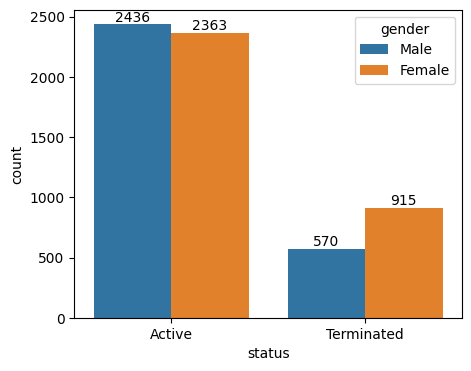

In [46]:
plt.figure(figsize=(5,4))
c=sns.countplot(df,hue='gender',x='status')

for i in c.containers:
    c.bar_label(i)

plt.show()

Observation: The number of female employees who left the company is higher than that of male employees.

15. get the proportion of employees in each term_type and  term_reason


In [47]:
ty=df['term_type'].value_counts()
tr=df['term_reason'].value_counts()

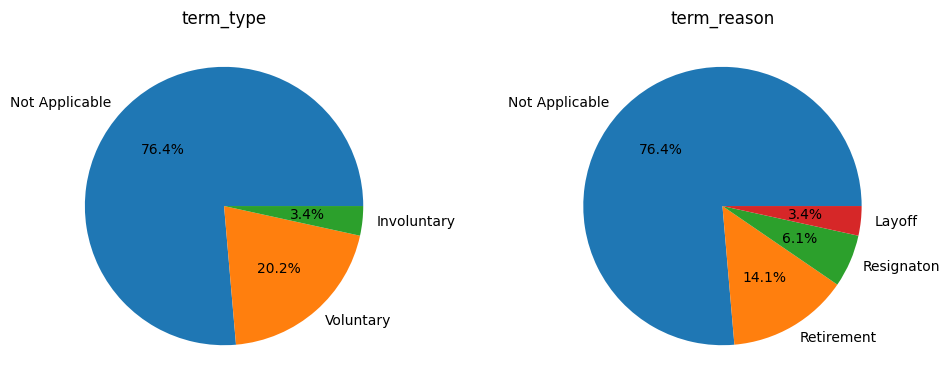

In [48]:
f,axes=plt.subplots(1,2,figsize=(10,4))
axes[0].pie(x=ty.values,labels=ty.index,autopct='%.1f%%')
axes[1].pie(x=tr.values,labels=tr.index,autopct='%.1f%%')

axes[0].set_title('term_type')
axes[1].set_title('term_reason')

plt.tight_layout()
plt.show()

observation:
Retirement is the most common reason for termination, followed by resignation and then layoffs

16. get the term_reason and gender wise no_of_voluntary employees

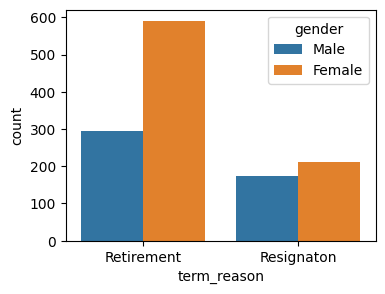

In [49]:
plt.figure(figsize=(4,3))

res=df.loc[df['term_type']=='Voluntary']
sns.countplot(res,x='term_reason',hue='gender')
plt.show()

Observation: The majority of retirements and resignations are from female employees.

17. get the term_reason and gender wise no_of_involuntary employees

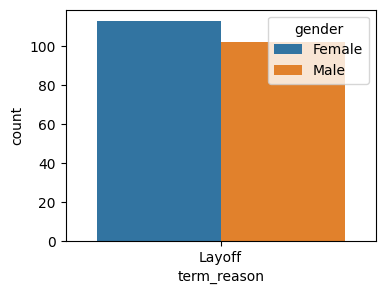

In [50]:
plt.figure(figsize=(4,3))

res=df.loc[df['term_type']=='Involuntary']
sns.countplot(res,x='term_reason',hue='gender')
plt.show()

Observation: In the layoff category, the number of female employees is slightly higher than that of male employees.

18. get the gender and exp_level wise no_of Active and Terminated emps

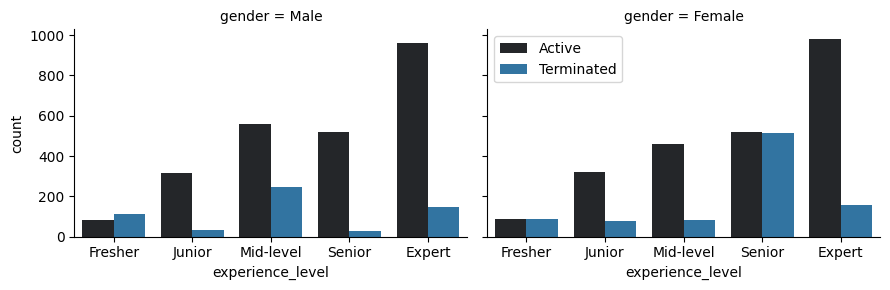

In [51]:

fg=sns.FacetGrid(df,col='gender',height=3, aspect=1.5)
fg.map_dataframe(sns.countplot,x='experience_level',hue='status',hue_order=['Active','Terminated'])
plt.legend()
plt.show()



observation:

Mid-level experienced males show higher terminations than other employee groups.

Senior females have higher terminations than other employee groups.

19. get the gender wise distribution of age 

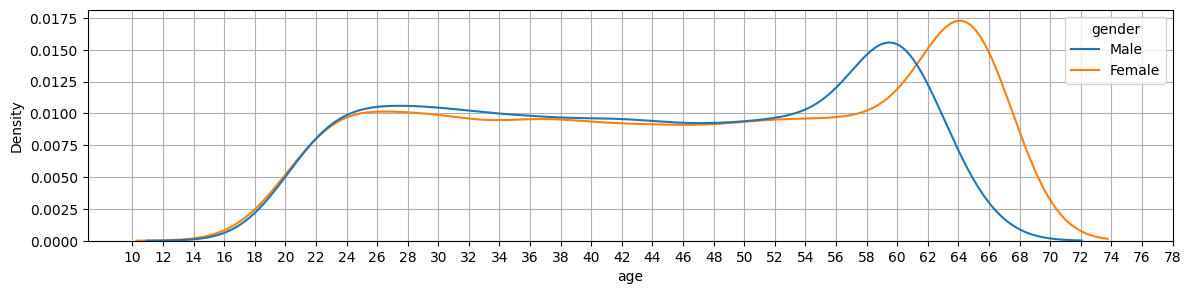

In [52]:
plt.figure(figsize=(14,3))

sns.kdeplot(df,x='age',hue='gender')
plt.xticks(range(10,80,2))
plt.grid()
plt.show()

observation:

The age distribution shows that most male employees are concentrated around 59 years, while most female employees are concentrated around 64 years. Both genders have fewer employees in younger age groups, and the overall density decreases after the peak ages.

Female employees tend to be slightly older than male employees in this dataset

20. get the proportion of employees in each experience_level

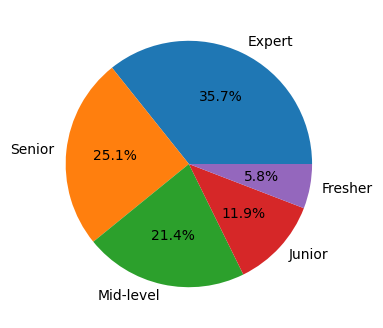

In [53]:
plt.figure(figsize=(5,4))
t=df['experience_level'].value_counts()
plt.pie(x=t.values,labels=t.index,autopct='%.1f%%')
plt.show()

Observation: The workforce is dominated by experts (35%), with freshers representing only (5.8%).

21. get the no_of_emps in each designation

In [54]:
idx=df['job'].value_counts().index

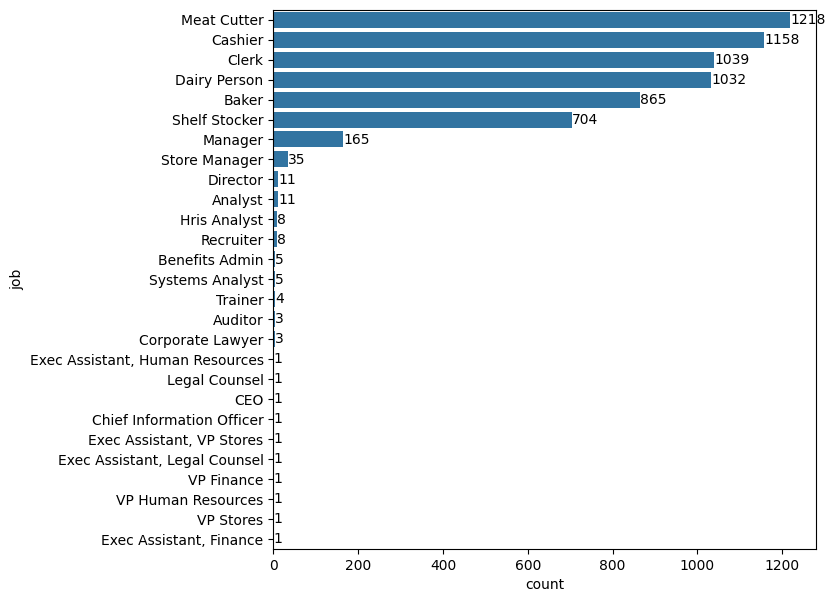

In [55]:
plt.figure(figsize=(7,7))

c=sns.countplot(df,y='job',order=idx)
c.bar_label(c.containers[0])

plt.show()

22. get the no_of Active and Terminated emps in each designation 

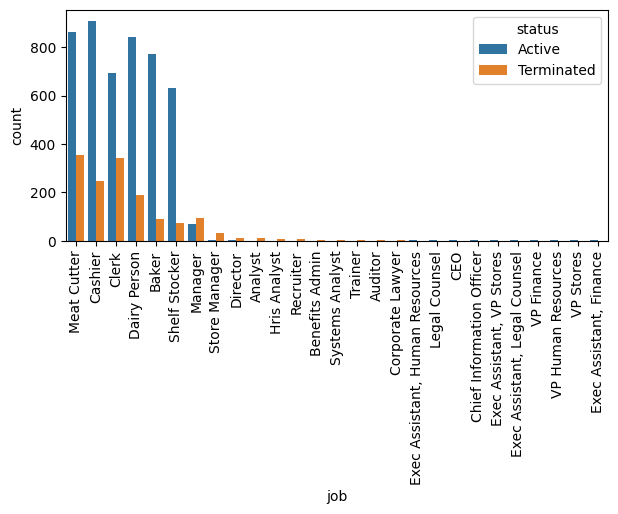

In [56]:
plt.figure(figsize=(7,3))

c=sns.countplot(df,x='job',hue='status',order=idx)
plt.xticks(rotation=90)

plt.show()

observation:
Terminations were highest among roles such as Meat Cutter, Clerk, Cashier, and Dairy Person


23. get the male and female count among terminated employees

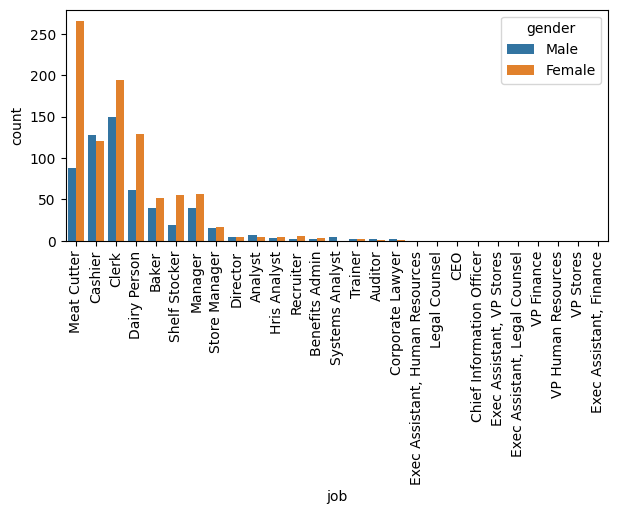

In [57]:
res=df.loc[df['status']=='Terminated']

plt.figure(figsize=(7,3))

sns.countplot(res,x='job',hue='gender',order=idx)
plt.xticks(rotation=90)

plt.show()

observation:

attriyion rate of female employees are higher compared to male employees.
Terminations were highest among roles such as Meat Cutter, Clerk, Cashier, and Dairy Person


24. get the gender wise distribution of experience


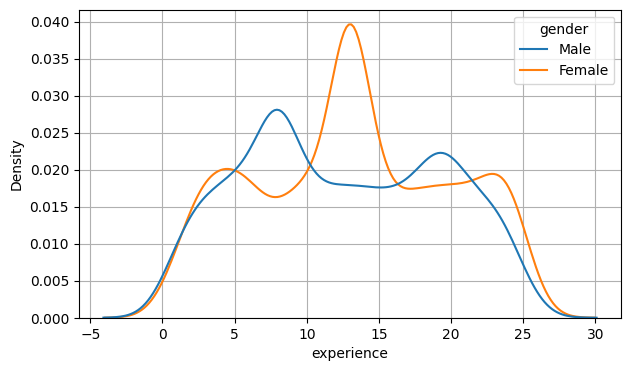

In [58]:
plt.figure(figsize=(7,4))

sns.kdeplot(df,x='experience',hue='gender')
plt.grid()
plt.show()

observation:

Most females have around 13 years of experience, while males have two main groups :- one around 7 years and another around 19 years. 

25. get the business unit wise no_of_male and female termination

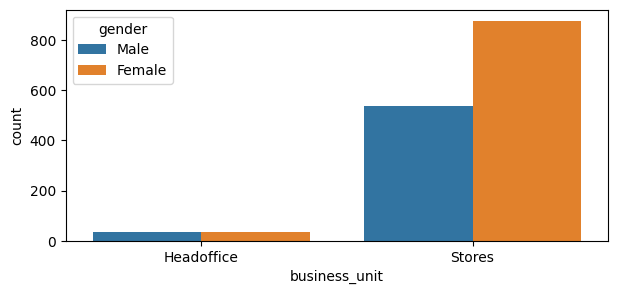

In [59]:
res=df.loc[df['status']=='Terminated']

plt.figure(figsize=(7,3))
sns.countplot(res,x='business_unit',hue='gender')
plt.show()

observation:

In stores, female attrition exceeds male attrition, while at the Head Office, both genders have similar attrition levels.

26. get the age distribution of terminated employees

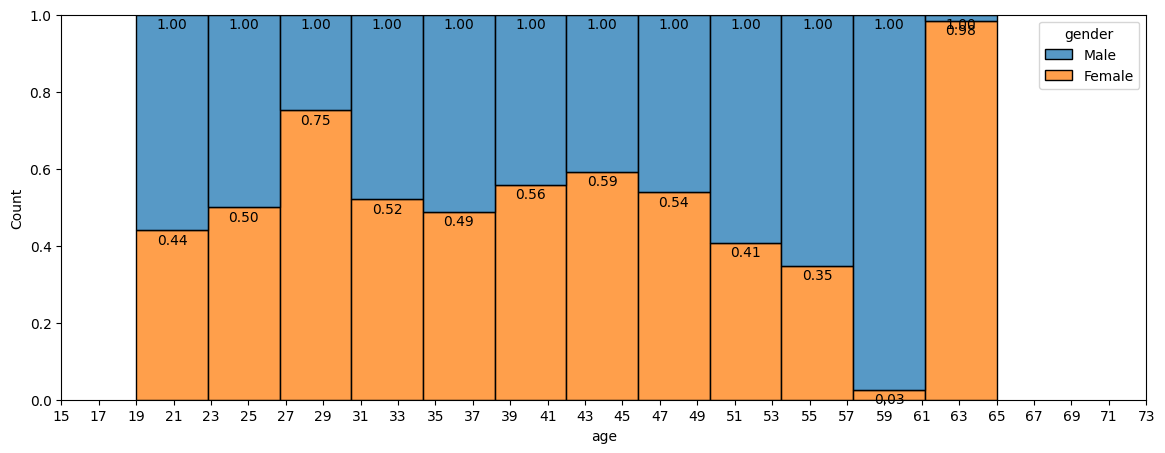

In [60]:
plt.figure(figsize=(14,5))
d=df.loc[df['status']=='Terminated']
c=sns.histplot(d,x='age',hue='gender',multiple='fill')

for i in c.containers:
    c.bar_label(i,fmt='%.2f',padding=-12)

plt.xticks(range(15,75,2))
plt.show()

observation:

Female employees in the 61–65 age group experienced nearly 98% termination, while those in the 26–31 age group had about 75% termination.

Male employees in the 57–61 age group faced approximately 97% termination, and those in the 53–57 age group had around 75% termination.

27. get the status wise relationship between age and experience 

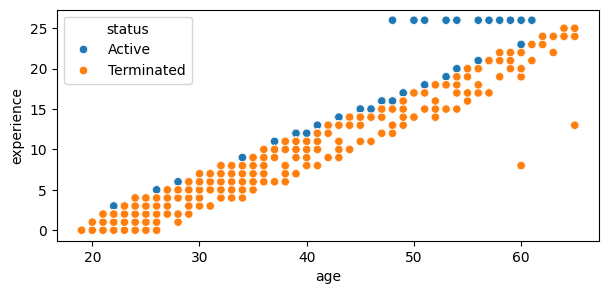

In [61]:

plt.figure(figsize=(7,3))
sns.scatterplot(df,x='age',y='experience',hue='status')
plt.show()

observation:

Age and experience generally show a linear relationship. However, some employees with very high age have only average experience, and employees with over 25 years of experience are mostly in the 46–60 age range.

28. get the status wise avg experience of male and female 

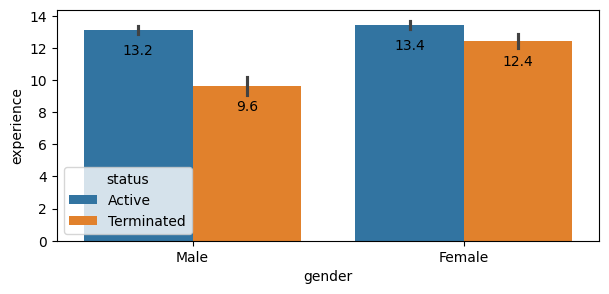

In [62]:
plt.figure(figsize=(7,3))

c=sns.barplot(df,x='gender',y='experience',hue='status')

for i in c.containers:
    c.bar_label(i,fmt='%.1f',padding=-20)

plt.show()

observation:

Active employees have higher experience than terminated employees

29. get the year wise no_of_hiring


In [63]:

hire_cnt=(df['hiredate'].dt.year).value_counts().sort_index().reset_index()
hire_cnt.columns=['year','hirings']

hire_cnt


,year,hirings
0,1989,86
1,1990,214
2,1991,200
3,1992,248
4,1993,298
5,1994,298
6,1995,312
7,1996,273
8,1997,312
9,1998,341


observation:Hiring occurred over 25 different years, with the highest number of hires in 1998 and the lowest in 1989.


30. get the year wise no_of_termination


In [64]:
res=df.loc[df['status']=='Terminated','status_year']

term_cnt=(res).value_counts().sort_index().reset_index()
term_cnt.columns=['year','terminations']

term_cnt

,year,terminations
0,2006,134
1,2007,162
2,2008,164
3,2009,142
4,2010,123
5,2011,110
6,2012,130
7,2013,105
8,2014,253
9,2015,162





observation:Terminations occurred over 10 different years, with the highest number of terminations in 2014 and the lowest in 2013.

31. get the no_of (hirings,terminations,retained_cnt,cummulative sum of retained_cnt) 

In [65]:

workforce_trends=pd.merge(hire_cnt,term_cnt,how='outer').fillna(0).astype(int)

workforce_trends['retained_cnt']=workforce_trends['hirings']-workforce_trends['terminations']
workforce_trends['cumm_retained_cnt']=workforce_trends['retained_cnt'].cumsum()

workforce_trends

,year,hirings,terminations,retained_cnt,cumm_retained_cnt
0,1989,86,0,86,86
1,1990,214,0,214,300
2,1991,200,0,200,500
3,1992,248,0,248,748
4,1993,298,0,298,1046
5,1994,298,0,298,1344
6,1995,312,0,312,1656
7,1996,273,0,273,1929
8,1997,312,0,312,2241
9,1998,341,0,341,2582


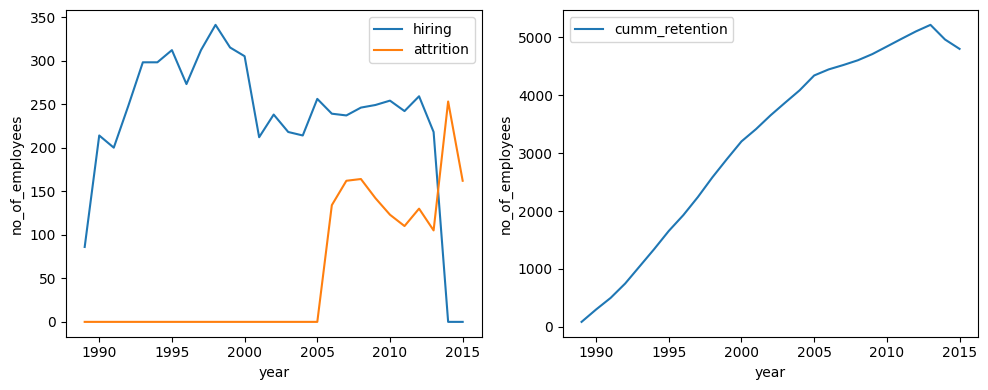

In [66]:
f,axes=plt.subplots(1,2,figsize=(10,4))


sns.lineplot(workforce_trends,x='year',y='hirings',label='hiring',ax=axes[0])
sns.lineplot(workforce_trends,x='year',y='terminations',label='attrition',ax=axes[0])
sns.lineplot(workforce_trends,x='year',y='cumm_retained_cnt',label='cumm_retention',ax=axes[1])
axes[0].set_ylabel('no_of_employees')
axes[1].set_ylabel('no_of_employees')

plt.legend()
plt.tight_layout()
plt.show()

observation:

From 1989 to 2013, the company consistently hired more employees than it lost, ensuring growth. However, in 2014 and 2015, hiring stopped while attrition continued, signaling a decline in the workforce.

32. What type of terminations occurred in 2014 and 2015, and which gender experienced a higher number of terminations ?


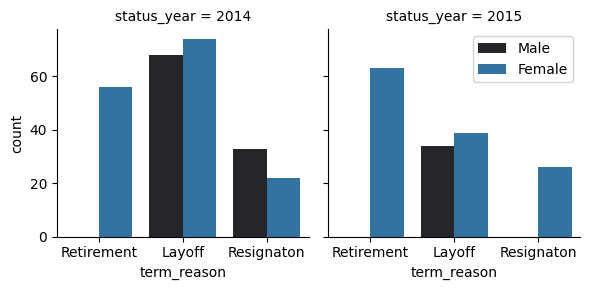

In [67]:
t=df.loc[ (df['status']=='Terminated') & (df['status_year'].isin([2014,2015])) ]
f=sns.FacetGrid(t,col='status_year')
f.map_dataframe(sns.countplot,x='term_reason',hue='gender',hue_order=['Male','Female'])
plt.legend()
plt.show()

observation:

Females had higher terminations due to retirement and layoff in both years.

Resignation patterns changed: in 2014, more males resigned, whereas in 2015, more females resigned.

33. Detect the outliers

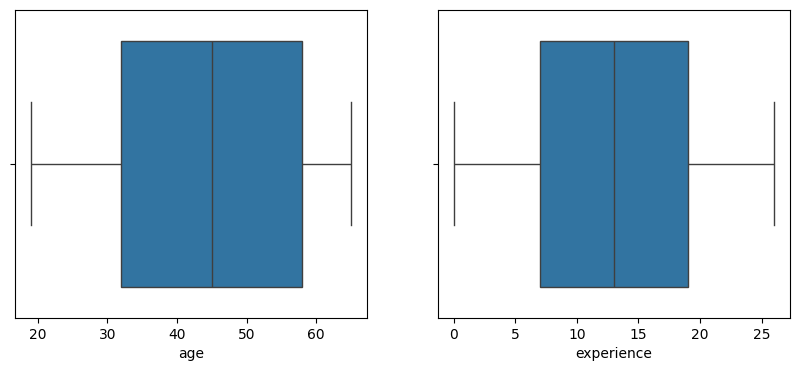

In [68]:
f,axes=plt.subplots(1,2,figsize=(10,4))
sns.boxplot(df,x='age',ax=axes[0])
sns.boxplot(df,x='experience',ax=axes[1])
plt.show()


observation:
No outliers were detected in either age or experience

34. get the correlation of all the numericall columns

<Axes: >

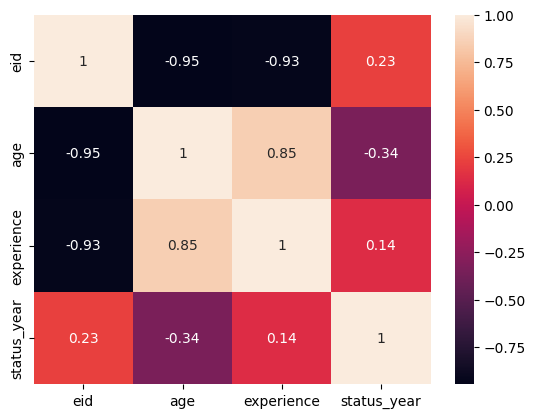

In [69]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

observation: age and experience have  strong  positive relation

# conclusion:

The company demonstrates a strong overall employee retention rate, though higher female terminations in 2014–2015 shifted the workforce slightly toward males. Terminations were highest in roles such as Meat Cutter, Clerk, Cashier, and Dairy Person, with mid-level males and senior females being the most affected.

Retirement is the leading reason for leaving, followed by resignation and layoffs, and active employees generally have more experience than those terminated. Age-specific trends show females aged 61–65 experienced nearly 98% termination, and those 26–31 had about 75%; males aged 57–61 faced around 97% termination, and those 53–57 had about 75%.

Age and experience mostly follow a linear relationship, though some older employees have only average experience. Employees with over 25 years of experience are primarily aged 46–60.